In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/fish.csv')

In [4]:
df.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [5]:
col=['Type','weight','l1','l2','l3','height','width']

In [9]:
df.columns=col
df.head()

,Type,weight,l1,l2,l3,height,width
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [10]:
x=df[['weight','l1']]

In [11]:
from sklearn.cluster import KMeans

In [12]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_#will calculate within cluster sum of squares(wcss value )
  wcss.append(css)

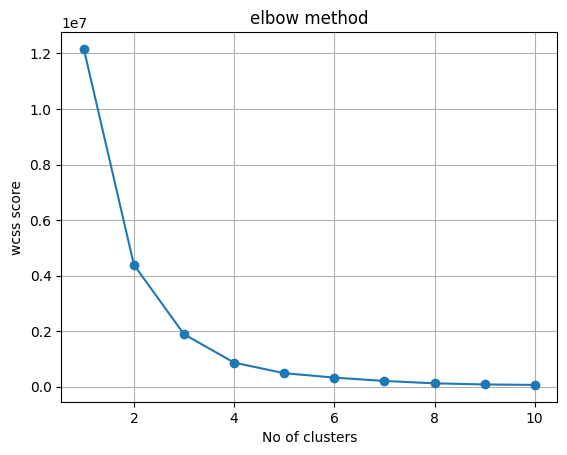

In [22]:
plt.plot(range(1,11),wcss,'o-')
plt.xlabel('No of clusters')
plt.ylabel('wcss score')
plt.title('elbow method')
plt.grid()
plt.show()

In [23]:
km=KMeans(n_clusters=4,n_init=10)
km.fit(x)

KMeans(n_clusters=4, n_init=10)

In [24]:
cluster_label=km.predict(x)

In [25]:
cluster_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 3], dtype=int32)

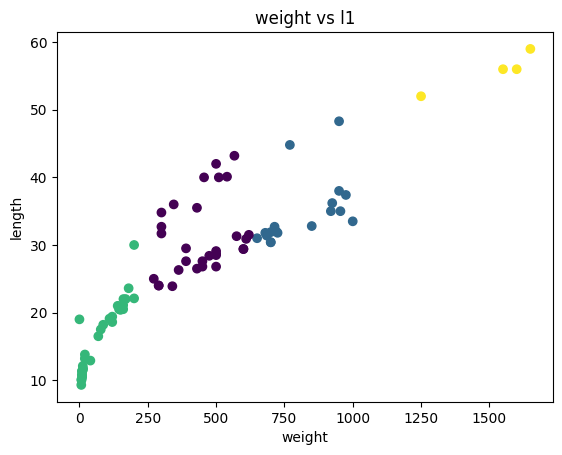

In [26]:
plt.scatter(x['weight'],x['l1'],c=cluster_label)
plt.xlabel('weight')
plt.ylabel('length')
plt.title('weight vs l1')
plt.show()

In [27]:
df['cluster labels']=cluster_label

In [28]:
df.head()

,Type,weight,l1,l2,l3,height,width,cluster labels
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8,0
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1,0
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3,0
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1,0
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2,0


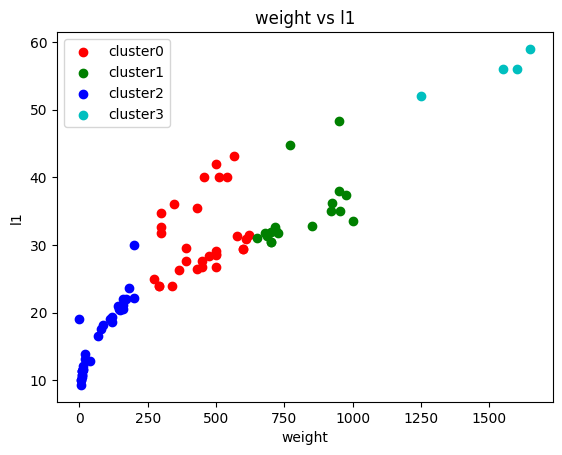

In [30]:
colors=['r','g','b','c']

for i in range(max(cluster_label+1)):
  cluster_data=x[cluster_label==i]
  plt.scatter(cluster_data['weight'],cluster_data['l1']
              ,c=colors[i],
              label=f'cluster{i}')
plt.xlabel('weight')
plt.ylabel('l1')
plt.title('weight vs l1')
plt.legend()
plt.show()

In [35]:
def predict_cluster(weight,l1):
  new_data=[[weight,l1]]
  cluster=km.predict(new_data)
  return cluster[0]

In [36]:
weight=20
l1=45
c=predict_cluster(weight,l1)
print(f'fish belongs to :{c}')

fish belongs to :2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [37]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [38]:
mergings=linkage(x,method='ward')

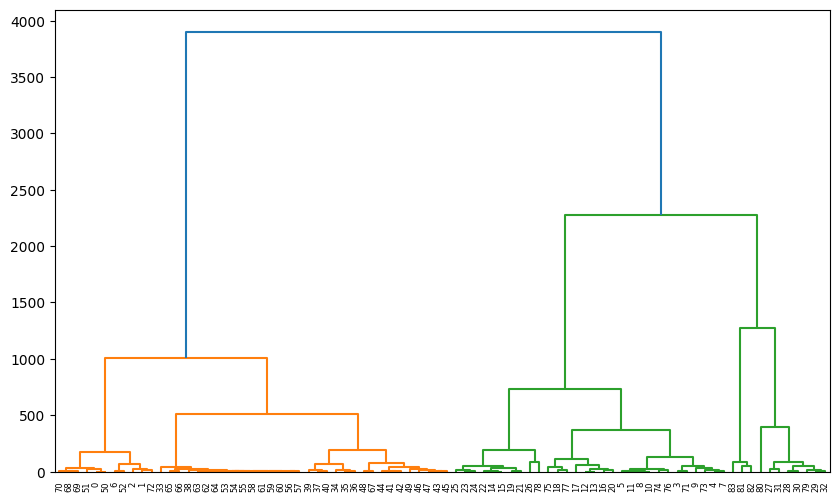

In [39]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [40]:
cluster_labels=fcluster(mergings,2500,criterion='distance')

In [ ]:
cluster_labels

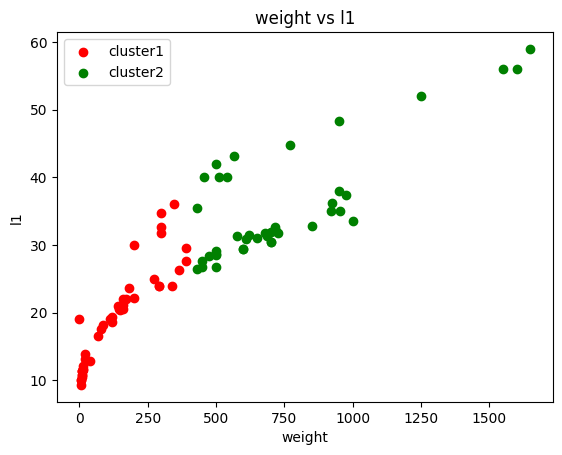

In [42]:
colors=['r','g']

for i in range(1,max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['weight'],cluster_data['l1']
              ,c=colors[i-1],
              label=f'cluster{i}')
plt.xlabel('weight')
plt.ylabel('l1')
plt.title('weight vs l1')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_labels)
print(sil_avg)

0.5833905371647047
